# Sleep Health EDA

## Occupation Analysis

In [1]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read csv

path = '../Sleep_health_and_lifestyle_dataset.csv'

df_full = pd.read_csv(path)

In [3]:
df_full.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df_full.shape

(374, 13)

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df_full.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
df_full.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [8]:
#cleaning

#change salesperson to match sales representative
df_full['Occupation'] = df_full['Occupation'].replace('Sales Representative', 'Salesperson')

#change normal weight to match normal
df_full['BMI Category'] = df_full['BMI Category'].replace('Normal Weight', 'Normal')

In [9]:
occupation_counts_full = df_full['Occupation'].value_counts()
occupation_counts_full

Nurse                73
Doctor               71
Engineer             63
Lawyer               47
Teacher              40
Accountant           37
Salesperson          34
Software Engineer     4
Scientist             4
Manager               1
Name: Occupation, dtype: int64

## Remove all sleep disorders from data

In [10]:
df = df_full[df_full['Sleep Disorder'] == 'None']
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [11]:
#df = df.drop('Sleep Disorder', axis=1)
#df.head()

In [12]:
df.shape

(219, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 359
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                219 non-null    int64  
 1   Gender                   219 non-null    object 
 2   Age                      219 non-null    int64  
 3   Occupation               219 non-null    object 
 4   Sleep Duration           219 non-null    float64
 5   Quality of Sleep         219 non-null    int64  
 6   Physical Activity Level  219 non-null    int64  
 7   Stress Level             219 non-null    int64  
 8   BMI Category             219 non-null    object 
 9   Blood Pressure           219 non-null    object 
 10  Heart Rate               219 non-null    int64  
 11  Daily Steps              219 non-null    int64  
 12  Sleep Disorder           219 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 24.0+ KB


In [14]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,146.972603,39.036530,7.358447,7.625571,57.949772,5.114155,69.018265,6852.968037
std,100.646895,7.827764,0.732320,0.975142,20.929814,1.591471,2.657797,1393.473600
min,1.000000,27.000000,6.000000,6.000000,30.000000,3.000000,65.000000,4200.000000
25%,65.500000,32.000000,7.100000,7.000000,30.000000,4.000000,68.000000,5000.000000
50%,128.000000,38.000000,7.400000,8.000000,60.000000,5.000000,70.000000,7000.000000
75%,207.500000,43.000000,7.800000,8.000000,75.000000,6.000000,70.000000,8000.000000
max,360.000000,59.000000,8.500000,9.000000,90.000000,8.000000,77.000000,10000.000000


In [15]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [16]:
#start looking at each occupation

occupation_counts = df['Occupation'].value_counts()
occupation_counts

Doctor               64
Engineer             57
Lawyer               42
Accountant           30
Nurse                 9
Teacher               9
Software Engineer     3
Scientist             2
Salesperson           2
Manager               1
Name: Occupation, dtype: int64

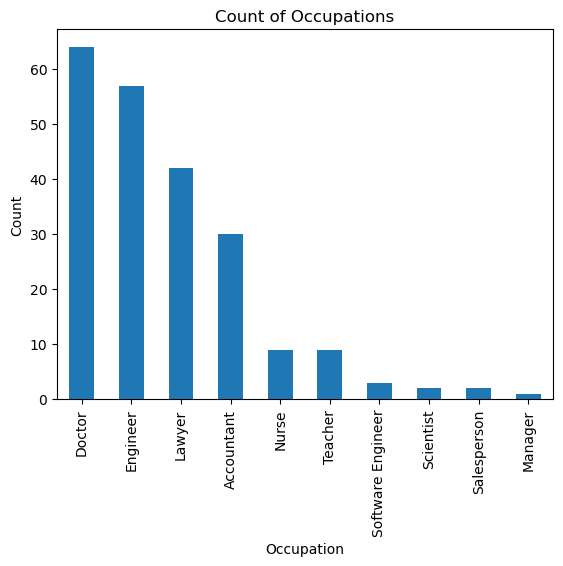

In [17]:
#graph the occupation counts
occupation_counts.plot(kind='bar')
plt.title('Count of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

In [18]:
#null hypothesis 
#higher steps dont improve sleep health

#alt hypothesis
#higher steps DO improve sleep health

In [19]:
print(f"Filtered: {len(occupation_counts)}")
print(f"Uniltered: {len(occupation_counts_full)}")

print(f'''
Filtered List:
{occupation_counts}
''')

print(f'''
Unfiltered List:
{occupation_counts_full}
''')

Filtered: 10
Uniltered: 10

Filtered List:
Doctor               64
Engineer             57
Lawyer               42
Accountant           30
Nurse                 9
Teacher               9
Software Engineer     3
Scientist             2
Salesperson           2
Manager               1
Name: Occupation, dtype: int64


Unfiltered List:
Nurse                73
Doctor               71
Engineer             63
Lawyer               47
Teacher              40
Accountant           37
Salesperson          34
Software Engineer     4
Scientist             4
Manager               1
Name: Occupation, dtype: int64



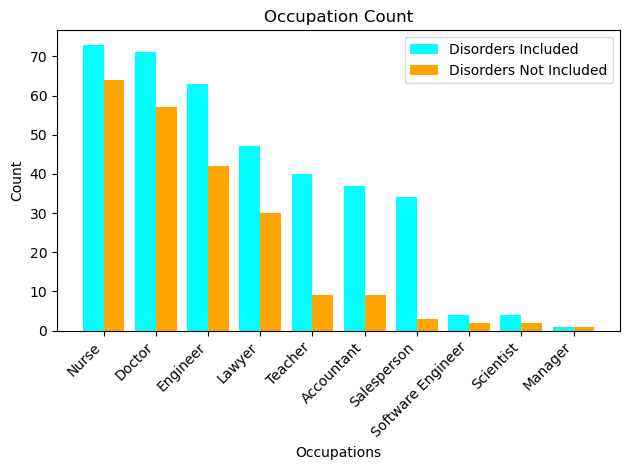

In [20]:
#compare occupation counts for total sample and no disorder sample

x = np.arange(len(occupation_counts_full))
width = 0.4

plt.bar(x - 0.2, occupation_counts_full, width, color='cyan')
plt.bar(x + 0.2, occupation_counts, width, color='orange')

plt.xticks(x, occupation_counts_full.index, rotation=45, ha='right')
plt.xlabel('Occupations')
plt.ylabel('Count')
plt.legend(['Disorders Included', 'Disorders Not Included'])
plt.title('Occupation Count')
plt.tight_layout()

plt.show()

# Next Steps

- correlation test between steps and sleep quality - trend line - pearson test
- anova between occupation sleep quality/steps